In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import random
import kwcoco
from pathlib import Path
from ultralytics.yolo.engine.results import Results

import utils


### COCO形式のデータセットをYOLO用に変換

In [2]:
coco = kwcoco.CocoDataset("./dataset/sentan-B_ball_detection_coco/sentan-B.json")

config_yaml = utils.coco2yolo(
                            output_dir = "./dataset/sentan-B_ball_detection_yolo/",
                            train      = coco,
                            val        = coco,
                            task       = "detection",
                            exist_ok   = True
                            )

print(config_yaml)

coco2yolo:train:   0%|          | 0/8 [00:00<?, ?it/s]

coco2yolo:valid: 100%|██████████| 8/8 [00:00<00:00, 228.14it/s]

dataset/sentan-B_ball_detection_yolo/config.yaml


### 作成したデータセットを確認

データセットの枚数：8 枚
(584, 600)
(528, 600)
(323, 474)
(917, 1500)
(790, 790)


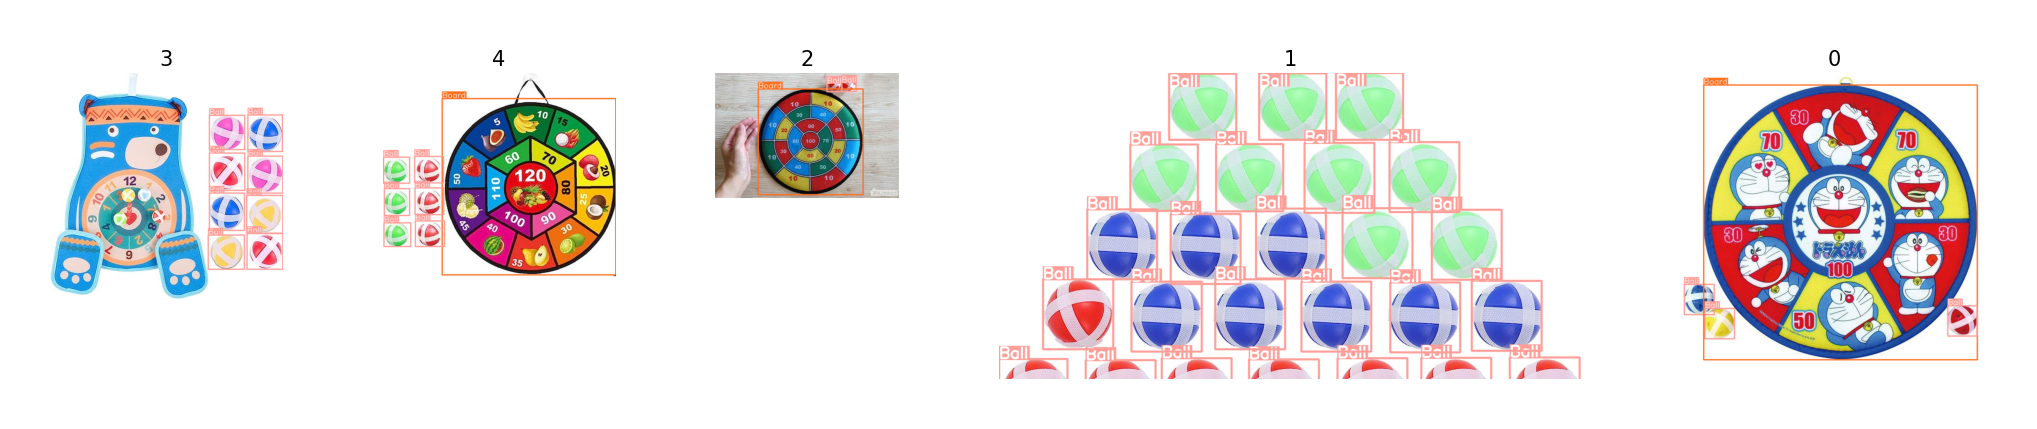

In [3]:
yolo_data_train = utils.YOLO_dataset(str(config_yaml), "train")

print(f"データセットの枚数：{len(yolo_data_train)} 枚")

imgs = {}
for i in random.sample(range(len(yolo_data_train)), 5):
    yolo_data = yolo_data_train[i]

    res = Results(
        orig_img  = yolo_data["orig_img"],
        path      = yolo_data["img_path"],
        names     = yolo_data_train.class_name,
        boxes     = yolo_data["bboxes"],
        # masks     = yolo_data["masks"],
        # keypoints = yolo_data["keypoints"],
    )

    imgs[i] = res.plot()[:, :, ::-1]

utils.show_imgs(imgs, ncol=5, dpi=500)